### Import files to test on

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from numpy import load
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D,Conv3D,Conv2DTranspose,MaxPooling3D,UpSampling3D
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.layers import concatenate 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
    data_model = '/content/gdrive/MyDrive/Zeta_Surgical_Segmentation/data_model/'
    npz_files = '/content/gdrive/MyDrive/Zeta_Surgical_Segmentation/Segmented_Numpy_Data/'
except:
    pass

Mounted at /content/gdrive


In [ ]:
#Weighted binary cross entropy 

def create_weighted_binary_crossentropy(zero_weight, one_weight):

    def weighted_binary_crossentropy(y_true, y_pred):

        
        # Calculate the binary crossentropy
        b_ce = K.binary_crossentropy(y_true, y_pred)

        # Apply the weights
        
        weight_vector = y_true * one_weight + (1. - y_true) * zero_weight
        weighted_b_ce = weight_vector * b_ce
        
        # Return the mean error
        return K.mean(weighted_b_ce)

    return weighted_binary_crossentropy

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
input_size = (80,128,128,1)


inputs = Input(input_size)
conv1 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)
conv2 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)
conv3 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)
conv4 = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling3D(pool_size=(2, 2, 2))(drop4)

conv5 = Conv3D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = Conv3D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv3D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 4)
conv6 = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = Conv3D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 4)
conv7 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

up8 = Conv3D(16, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 4)
conv8 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = Conv3D(8, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 4)
conv9 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = Conv3D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv10 = Conv3D(1, 1, activation = 'sigmoid')(conv9)

In [ ]:
model = Model(inputs = inputs, outputs = conv10)

#For trial with weighted binary cross entropy 
#Assigning lower weights to class 0 and higher to class 1 
model_loss = create_weighted_binary_crossentropy(zero_weight = 0.2, one_weight = 0.8 )

#Learning rate= 0.0002
model.compile(optimizer = Adam(lr = 2e-4), loss = model_loss , metrics = ['accuracy', f1_m])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 128, 12  0           []                               
                                8, 1)]                                                            
                                                                                                  
 conv3d (Conv3D)                (None, 80, 128, 128  224         ['input_1[0][0]']                
                                , 8)                                                              
                                                                                                  
 conv3d_1 (Conv3D)              (None, 80, 128, 128  1736        ['conv3d[0][0]']                 
                                , 8)                                                        

In [ ]:
# Load best model weights 
model.load_weights(data_model + 'model_3d_seg.h5')
X_testing= np.load(npz_files + 'OAS1_0082_MR.npz')['arr_0'][42:122,37:165,20:148]
Y_testing= np.load(npz_files + 'OAS1_0082_MRseg.npz')['arr_0'][42:122,37:165,20:148]


X_testing = X_testing.reshape(1,80,128,128,-1)

print(X_testing.shape)
print(Y_testing.shape)

y_predict = np.around(model.predict(X_testing))

y_predict = y_predict.reshape(-1,80,128,128)

(1, 80, 128, 128, 1)
(80, 128, 128)


### Accuracy test

In [ ]:
#Get predicted and testing sample
PJ = y_predict.reshape(-1)
AJ = Y_testing.reshape(-1)

# Count number of matching voxels in prediction and test
count = 0
for i in range(PJ.shape[0]):
    if PJ[i] == AJ[i]:
        if PJ[i]==1:
            count += 1
#Get actual non_zeros(ventricle voxels)    
total = np.count_nonzero(AJ)

#Print resulting accuracy
print("Predicted number of segment pixel: ", count)
print("Actual number of segment pixel: ", np.count_nonzero(Y_testing))     
print("Predicted Accuracy :", count/total)

Predicted number of segment pixel:  32846
Actual number of segment pixel:  35952
Predicted Accuracy : 0.9136070315976857


### Visualizing Predictions

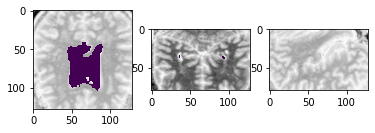

In [ ]:
f, ax = plt.subplots(1,3)

# 80 x 128 x 128
X_plot = X_testing.reshape(80,128,128)
y_plot = y_predict.reshape(80,128,128)

# Formula x-axis: Actual Pixel Loc - 44 = Trunc. Pixel Loc
ax[0].imshow(X_plot[56,:,:],cmap="Greys")
ax[0].imshow(np.ma.masked_array(y_plot[56,:,:], y_plot[56,:,:]==0.0))

# Formula y-axis: Actual Pixel Loc - 52 = Trunc. Pixel Loc
ax[1].imshow(X_plot[:,28,:],cmap="Greys")
ax[1].imshow(np.ma.masked_array(y_plot[:,28,:], y_plot[:,28,:]==0.0))

# Formula z-axis: Actual Pixel Loc - 44 = Trunc. Pixel Loc
ax[2].imshow(X_plot[:,:,26],cmap="Greys")
ax[2].imshow(np.ma.masked_array(y_plot[:,:,26], y_plot[:,:,26]==0.0))

plt.savefig(data_model + 'predictions.png')


### Visualizing Actual samples

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


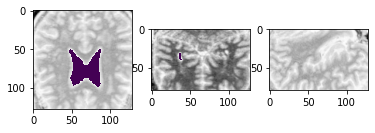

In [ ]:
f, ax = plt.subplots(1,3)

# 80 x 128 x 128

# Formula x-axis: Actual Pixel Loc - 44 = Trunc. Pixel Loc
ax[0].imshow(X_plot[56,:,:],cmap="Greys")
ax[0].imshow(np.ma.masked_array(Y_testing[56,:,:], Y_testing[56,:,:]==0.0))

# Formula y-axis: Actual Pixel Loc - 52 = Trunc. Pixel Loc
ax[1].imshow(X_plot[:,28,:],cmap="Greys")
ax[1].imshow(np.ma.masked_array(Y_testing[:,28,:], Y_testing[:,28,:]==0.0))

# Formula z-axis: Actual Pixel Loc - 44 = Trunc. Pixel Loc
ax[2].imshow(X_plot[:,:,26],cmap="Greys")
ax[2].imshow(np.ma.masked_array(Y_testing[:,:,26], Y_testing[:,:,26]==0.0))

plt.savefig(data_model + 'actual.png')